In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

### Checking the train.csv file 

In [ ]:
! pwd

In [1]:
import pandas as pd

path = '../raw_data/train_sample_500/train_data_sample.csv'
data_sample = pd.read_csv(path)
data_sample

,image,species,individual_id,speciesv2
0,6683d80c1959e3.jpg,bottlenose_dolphin,4b8534134eb8,dolphin
1,2238b609533863.jpg,gray_whale,80d282ac5d45,whale
2,d6c5ca6001c910.jpg,beluga,617368452785,beluga
3,8cb9be04270854.jpg,dusky_dolphin,0eb252b85dc0,dolphin
4,2f5923f7aa8f37.jpg,blue_whale,e82a1c06b910,whale
...,...,...,...,...
495,a57d922da74d3e.jpg,humpback_whale,b2a4a87ffb86,whale
496,32d6b705eab7b5.jpg,humpback_whale,03c879f7c6d5,whale
497,7921becb3753c5.jpg,gray_whale,20312a4e3881,whale
498,199e168b341d48.jpg,spinner_dolphin,33f106fc9744,dolphin


### Load data images from local repo

In [ ]:
#!/usr/bin/python
from os import listdir

In [ ]:
! pwd

In [ ]:
#! pip install opencv-python

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [3]:
path = "../raw_data/train_sample_500/train_sample_image/"
#images_list = listdir(path)

In [4]:
images_list = list(data_sample['image'])

In [5]:
# This block code includes a resizing step

loaded_images = []
for image in images_list[:100]:   ### change this value for a subsample only ###
    
    img = mpimg.imread(path + image)
    img = cv2.resize(img, dsize=(256, 256), interpolation= cv2.INTER_LINEAR)
    loaded_images.append(np.array(img))

In [6]:
print(type(loaded_images))
print(len(loaded_images))

<class 'list'>
100


In [7]:
loaded_images[3].shape

(256, 256, 3)

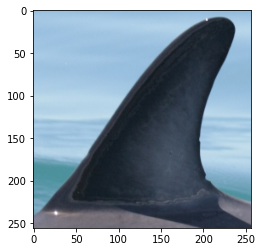

In [8]:
#Image was re-sized 256,256
plt.imshow(loaded_images[3], cmap='gray') ### modify the index to show another image ###

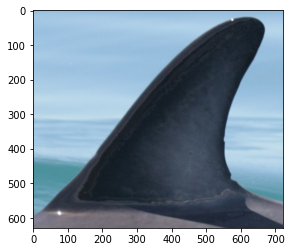

In [9]:
#Same image before re-sizing
link = path+images_list[3] ### modify the index to show another image ###
previous_image = mpimg.imread(link)
plt.imshow(previous_image, cmap='gray')

### Making sure all the images are in RGB format

In [10]:
# Code a function which will detect the index of B&W images
list_index_bw = []
list_len = []
for index,img in enumerate(loaded_images):
    if len(img.shape) != 3:
        list_index_bw.append(index)
        list_len.append(len(img.shape))

In [11]:
list_index_bw

[7, 9, 23, 83, 99]

In [12]:
list_len

[2, 2, 2, 2, 2]

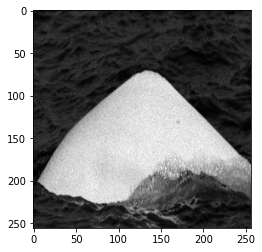

In [14]:
#Image in greyscale format
plt.imshow(loaded_images[7], cmap='gray')  ### modify the index to show another image ###

In [16]:
# Shape of B&W image
loaded_images[7].shape ### modify the index to select another image ###

(256, 256)

In [17]:
# How many images are in B&W?
len(list_index_bw)

5

In [18]:
#Code a function which will convert B&W image into RGB image
for i in list_index_bw:
    loaded_images[i] = np.stack((loaded_images[i],)*3, axis=-1)

In [19]:
# Shape of RGB-newly converted image
loaded_images[7].shape

(256, 256, 3)

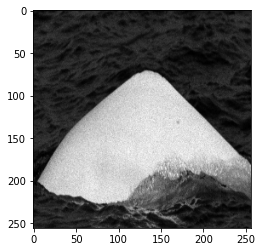

In [20]:
#Same image in RGB format
plt.imshow(loaded_images[7], cmap='gray')

### Defining X

In [21]:
# Conver the list of images into a np ndarray
X = np.array(loaded_images)

In [22]:
X.shape

(100, 256, 256, 3)

### Defining y

In [23]:
classes = {'whale':0, 'dolphin':1, 'beluga':2}

In [24]:
#Add a new column 'class' on data_sample df
data_sample['class'] = data_sample['speciesv2'].map(classes)

In [25]:
data_sample

,image,species,individual_id,speciesv2,class
0,6683d80c1959e3.jpg,bottlenose_dolphin,4b8534134eb8,dolphin,1
1,2238b609533863.jpg,gray_whale,80d282ac5d45,whale,0
2,d6c5ca6001c910.jpg,beluga,617368452785,beluga,2
3,8cb9be04270854.jpg,dusky_dolphin,0eb252b85dc0,dolphin,1
4,2f5923f7aa8f37.jpg,blue_whale,e82a1c06b910,whale,0
...,...,...,...,...,...
495,a57d922da74d3e.jpg,humpback_whale,b2a4a87ffb86,whale,0
496,32d6b705eab7b5.jpg,humpback_whale,03c879f7c6d5,whale,0
497,7921becb3753c5.jpg,gray_whale,20312a4e3881,whale,0
498,199e168b341d48.jpg,spinner_dolphin,33f106fc9744,dolphin,1


In [ ]:
! pwd

In [ ]:
#! pip install tensorflow

In [26]:
data_sample

,image,species,individual_id,speciesv2,class
0,6683d80c1959e3.jpg,bottlenose_dolphin,4b8534134eb8,dolphin,1
1,2238b609533863.jpg,gray_whale,80d282ac5d45,whale,0
2,d6c5ca6001c910.jpg,beluga,617368452785,beluga,2
3,8cb9be04270854.jpg,dusky_dolphin,0eb252b85dc0,dolphin,1
4,2f5923f7aa8f37.jpg,blue_whale,e82a1c06b910,whale,0
...,...,...,...,...,...
495,a57d922da74d3e.jpg,humpback_whale,b2a4a87ffb86,whale,0
496,32d6b705eab7b5.jpg,humpback_whale,03c879f7c6d5,whale,0
497,7921becb3753c5.jpg,gray_whale,20312a4e3881,whale,0
498,199e168b341d48.jpg,spinner_dolphin,33f106fc9744,dolphin,1


In [37]:
# Encoding class in categories
from tensorflow.keras.utils import to_categorical


num_classes = 3
y = to_categorical(data_sample['class'][:100])
len(y)

100

### Train/Val/Test split

Use the following method to create X_train, y_train, X_val, y_val, X_test, y_test, num_classes

In [38]:
first_split = int(len(loaded_images) /6.)
second_split = first_split + int(len(loaded_images) * 0.2)
X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]

In [39]:
print (len(X_test), len(X_val), len(X_train))

16 20 64


In [40]:
print (len(y_test), len(y_val), len(y_train))

16 20 64


In [ ]:
### TROP COMPLEXE POUR LE MOMENT -- NE PAS RUNNER CETTE CELLULE

from tensorflow.keras.utils import to_categorical
#from tqdm import tqdm
import numpy as np
import os
from PIL import Image

def load_data(loading_method):
    if loading_method == 'colab':
        data_path = '/content/drive/My Drive/Deep_learning_data/flowers'
    elif loading_method == 'direct':
        data_path = 'flowers/' #### to modify
    classes = {'whale':0, 'dolphin':1, 'beluga':2}
    imgs = []
    labels = [] 
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:300]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path)
                image = image.resize((256, 256))
                imgs.append(np.array(image))
                labels.append(i)

    X = np.array(imgs)
    #num_classes = len(set(labels)) #>>> pas besoin de cela pour nous - remplacé par la ligne du dessous
    num_classes = 3
    y = to_categorical(labels, num_classes)

    # Finally we shuffle:   #>>> check if necessary for us!! 
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]

    first_split = int(len(imgs) /6.)
    second_split = first_split + int(len(imgs) * 0.2)
    X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
    y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test, num_classes

### A CNN architecture, using a pre-trained CNN = Transfer learning

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
    
    model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape) ### Faire attention à la shape -- Il faut probablement modifier cel !! ###
    
    return model

**Look at the architecture of the model using .summary()**

In [ ]:
model = load_model()
model.summary()

💪 Impressive, right? Two things to notice:
- It ends with a combo Conv2D/MaxPooling2D 
- The `layers.Flatten` and the `layers.Dense` are not here yet, we need to add them.
- There are more than 14.000.000 parameters, which is a lot... 
    - We could fine-tune them, i.e. update them as we will update the weights of the dense layers, but it will take a lot of time....
    - For this reason, we will inform the model that the layers until the flattening will be set non-trainable.

**Deactivating the training of the VGG16 paramters** 

* Write a first function which:
    - takes the previous model as the input
    - sets the first layers to be non-trainable, by applying **`model.trainable = False`**
    - returns the model.

* Then inspect the summary of the model to check that the parameters are no longer trainable, they were set to be  **`non-trainable`**.

In [ ]:
def set_nontrainable_layers(model):
    
    # Set the first layers to be untrainable
    model.trainable = False
    
    return model

In [ ]:
model = set_nontrainable_layers(model)
model.summary()

**Chaining the pretrained convolutional layers of VGG16 with our own dense layers**

We will write a function that adds flattening and dense layers after the convolutional layers. 

In [ ]:
from tensorflow.keras import layers, models

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainables, and add additional trainable layers on top'''
    # $CHALLENGIFY_BEGIN
    base_model = set_nontrainable_layers(model)
    flatten_layer = layers.Flatten() ### modify this
    dense_layer = layers.Dense(500, activation='relu') ### modify this
    prediction_layer = layers.Dense(3, activation='softmax') ### modify this
    
    
    model = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
    # $CHALLENGIFY_END
    return model

**Inspect the parameters of a customized VGG16**

In [ ]:
model = add_last_layers(model)
model.summary()

**Building a function that creates a full customized VGG16 and compiles it**

In [ ]:
from tensorflow.keras import optimizers

def build_model():
    # $CHALLENGIFY_BEGIN    
    model = load_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam(learning_rate=1e-4) #>>> We advise the adam optimizer with learning_rate=1e-4
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy']) #>>> To modify it ?
    return model
    # $CHALLENGIFY_END

### Back to the data

🚨 The VGG16 model was trained on images which were preprocessed in a specific way. This is the reason why we did _NOT_ normalize them earlier.

Apply the specific processing to the original (non-normalized) images here using the method **`preprocess_input`** that you can import from **`tensorflow.keras.applications.vgg16`**

📚 Cf. [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
X_train = preprocess_input(X_train) 
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

### Fit the model

**Training the customized VGG16**

* Train the model with an Early stopping criterion on the validation accuracy -
* Since the validation data are provided, therefore use `validation_data` instead of `validation_split`.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model = build_model()

es = EarlyStopping(monitor = 'val_accuracy', #>>> shall we modify this ?
                   mode = 'max', #>>> not sure what is that?
                   patience = 5, 
                   verbose = 1, 
                   restore_best_weights = True)

history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=50, 
                    batch_size=16, 
                    callbacks=[es])

### Looking at the history

### Evaluating the model

In [ ]:
# double check the code below

In [ ]:
res_vgg = model.evaluate(X_test, y_test)

test_accuracy_vgg = res_vgg[-1]


print(f"test_accuracy_vgg = {round(test_accuracy_vgg,2)*100} %")

print(f"test_accuracy = {round(test_accuracy,2)*100} %")

print(f'Chance level: {1./num_classes*100:.1f}%')

### Improve the model